### preprocess_dataset

- 今回の一連の処理で対象となる元画像（絵文字）を用意（-> image_path）
    - /emoji-gan/emoji/unicode
    - ファイル名は unicode のものを用意（unicode でなくてもいいはずだが、元々用意しているものが unicode なので）
- 今回の処理の対象になるファイル名（unicode）の一覧を用意しておく（-> code_list）
    - /emoji-gan/emoji/description/unicode.txt
- unicode のファイル名と、それに番号付けしたディクショナリを作成
```Python
    {'1f915': 33, '1f622': 5, '1f60b': 69, '1f624': 16, '1f604': 71, '1f92e': 49, '1f635': 11, '1f60e': 56, '1f607': 77, '1f619': 12, '1f62a': 24, '1f611': 73, '1f632': 21, '1f914': 36, '1f643': 30, '1f912': 28, '1f9d0': 41, '1f911': 32, '1f625': 15, '1f92b': 45, '1f910': 29, '1f922': 51, '1f917': 38, '1f61d': 81, '1f61a': 55, '1f92f': 47, '1f612': 79, '1f61f': 68, '1f602': 52, '1f627': 23, '1f630': 17, '1f62c': 13, '1f628': 64, '1f600': 66, '1f615': 59, '1f629': 62, '1f642': 31, '1f633': 22, '1f621': 10, '1f631': 14, '1f636': 4, '1f913': 25, '1f92a': 40, '1f928': 35, '1f603': 58, '1f616': 53, '1f617': 57, '1f929': 34, '1f60c': 74, '1f618': 19, '1f620': 7, '1f610': 70, '1f924': 44, '1f606': 80, '1f62b': 18, '1f626': 20, '1f644': 37, '1f60f': 63, '1f60d': 54, '1f609': 9, '1f637': 1, '1f61c': 61, '1f623': 0, '1f62e': 2, '1f927': 39, '2639': 26, '1f641': 27, '1f605': 72, '1f61e': 76, '1f920': 46, '1f925': 43, '1f92c': 42, '1f61b': 65, '1f614': 67, '1f62d': 3, '1f923': 48, '1f62f': 8, '1f60a': 75, '1f601': 60, '1f92d': 50, '1f613': 78, '1f634': 6}
```
- 絵文字画像のファイル名（unicode）と、元々用意していた「処理対象とするファイル名の一覧」（code_list）を比較して、処理対象とするものだけコピーして emoji/edited ディレクトリに分ける。そのとき、上で作成したディクショナリを利用して、ファイル名は番号（1.pngなど）にする。

In [11]:
import sys
import shutil
from pathlib import Path 

def preprocess_emoji(dset_path):
    # make emoji unicode vocabulary 
    code_vocaburary = {}
    code_path = Path('./emoji/description/unicode.txt')
    code_list = code_path.read_text(encoding='utf-8').split('\n')

    print('code_list is ', code_list)
    
    for index, data in enumerate(code_list):
        code_vocaburary[data] = index
    
    print('code_vocaburary is ', code_vocaburary)
    
    # chack dataset path
    image_path = Path(dset_path)
    
    print('image_path is ', image_path)
    
    if image_path.exists() == False:
        exit('Check your dataset path!')
    
    # copy designated emoji images
    for filepath in list(image_path.glob("*.png")):
        if str(filepath.name.split(".")[0]) in code_list:
            print('filepath.name.split(".") is', filepath.name.split("."))
            print(str(filepath), \
                './emoji/edited/' + str(code_vocaburary[filepath.name.split(".")[0]]) + '.png')
            
            #shutil.copyfile(str(filepath), \
            #    './emoji/edited/' + str(code_vocaburary[filepath.name.split(".")[0]]) + '.png')

In [12]:
preprocess_emoji('./emoji/unicode')

code_list is  ['1f623', '1f637', '1f62e', '1f62d', '1f636', '1f622', '1f634', '1f620', '1f62f', '1f609', '1f621', '1f635', '1f619', '1f62c', '1f631', '1f625', '1f624', '1f630', '1f62b', '1f618', '1f626', '1f632', '1f633', '1f627', '1f62a', '1f913', '2639', '1f641', '1f912', '1f910', '1f643', '1f642', '1f911', '1f915', '1f929', '1f928', '1f914', '1f644', '1f917', '1f927', '1f92a', '1f9d0', '1f92c', '1f925', '1f924', '1f92b', '1f920', '1f92f', '1f923', '1f92e', '1f92d', '1f922', '1f602', '1f616', '1f60d', '1f61a', '1f60e', '1f617', '1f603', '1f615', '1f601', '1f61c', '1f629', '1f60f', '1f628', '1f61b', '1f600', '1f614', '1f61f', '1f60b', '1f610', '1f604', '1f605', '1f611', '1f60c', '1f60a', '1f61e', '1f607', '1f613', '1f612', '1f606', '1f61d']
code_vocaburary is  {'1f915': 33, '1f622': 5, '1f60b': 69, '1f624': 16, '1f604': 71, '1f92e': 49, '1f635': 11, '1f60e': 56, '1f607': 77, '1f619': 12, '1f62a': 24, '1f611': 73, '1f632': 21, '1f914': 36, '1f643': 30, '1f912': 28, '1f9d0': 41, '1f911'

In [37]:
from utils.glove_loader import GloveModel
glove_model = GloveModel()
glove_model.load(data_dir_path='./utils/glove.6B.300d.txt', embedding_dim=300)

In [149]:
emb_dict = glove_model.word2em
print('the total length of embedding is ', len(emb_dict))
print('each emb dim is : ', emb_dict["d'orsay"].shape)

the total length of embedding is  400000
each emb dim is :  (300,)


### 絵文字の説明文に出現する単語を Check

In [41]:
with open('emoji/description/english.txt') as f:
    txt_list = f.readlines()
txt = []
txt_list_in_list = [txt.replace('\n', '').replace('-',' ').split() for txt in txt_list]
for txt_list in txt_list_in_list:
    for i in range(len(txt_list)):
        txt.append(txt_list[i])
vocab = set(txt)
vocab

{'a',
 'angry',
 'anguished',
 'anxious',
 'astonished',
 'bandage',
 'beaming',
 'big',
 'blowing',
 'but',
 'closed',
 'confounded',
 'confused',
 'cowboy',
 'crazy',
 'crying',
 'disappointed',
 'dizzy',
 'down',
 'downcast',
 'drooling',
 'exploding',
 'eyebrow',
 'eyes',
 'face',
 'fear',
 'fearful',
 'floor',
 'flushed',
 'food',
 'from',
 'frowning',
 'grimacing',
 'grinning',
 'halo',
 'hand',
 'hat',
 'head',
 'heart',
 'hugging',
 'hushed',
 'in',
 'joy',
 'kiss',
 'kissing',
 'laughing',
 'loudly',
 'lying',
 'mask',
 'medical',
 'money',
 'monocle',
 'mouth',
 'nauseated',
 'nerd',
 'neutral',
 'nose',
 'of',
 'on',
 'open',
 'over',
 'pensive',
 'persevering',
 'pouting',
 'raised',
 'relieved',
 'rolling',
 'sad',
 'savoring',
 'screaming',
 'shushing',
 'sleeping',
 'sleepy',
 'slightly',
 'smiling',
 'smirking',
 'sneezing',
 'squinting',
 'star',
 'steam',
 'struck',
 'sunglasses',
 'sweat',
 'symbols',
 'tears',
 'the',
 'thermometer',
 'thinking',
 'tired',
 'tongue'

In [42]:
# 元の絵文字の説明テキストに含まれる単語のVectors
emb_of_voc = {}
for word in vocab:
    emb_of_voc[word] = emb_dict[word]
emb_of_voc

{'a': array([-2.9712e-01,  9.4049e-02, -9.6662e-02, -3.4400e-01, -1.8483e-01,
        -1.2329e-01, -1.1656e-01, -9.9692e-02,  1.7265e-01, -1.6386e+00,
         1.0220e-01,  3.4253e-02, -2.4213e-01,  4.8212e-02,  2.7060e-01,
         3.5996e-01, -4.0779e-01,  2.3785e-01,  2.4245e-01, -3.1107e-01,
        -4.8287e-01,  2.6101e-01,  1.1878e-01,  5.1011e-01, -3.1115e-01,
        -3.7005e-01,  1.1625e-01, -4.2061e-01, -3.4391e-02,  1.1809e-01,
        -4.8955e-01,  3.3693e-01, -1.3387e-01,  3.4924e-01, -8.3700e-01,
         5.6691e-01, -5.3670e-01,  3.8559e-01, -2.8975e-01,  6.2470e-01,
         4.8489e-01,  3.6357e-01,  3.5868e-01,  8.9597e-02, -5.5360e-02,
         1.1218e-01,  2.5683e-01, -7.6713e-02, -1.9422e-01, -1.8243e-01,
        -3.2841e-01,  6.4014e-02,  5.1971e-02,  2.0494e-01,  9.9948e-02,
        -2.7160e-01, -4.6416e-01,  1.0966e-01,  3.8606e-01, -3.8436e-01,
        -3.8772e-01,  2.8296e-01,  6.2533e-01, -2.1405e-01, -3.7540e-01,
        -5.7913e-01, -1.2510e-01, -1.7104e-01,

## 絵文字の説明文に含まれる単語たちをプロット
- 参考：[Visualizing Word Vectors with t-SNE](https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.offsetbox import OffsetImage, AnnotationBbox 


def imscatter(x, y, image, ax=None, zoom=1): 
    artists = [] 
    
    for i, (x0, y0) in enumerate(zip(x, y)): 
        if ax is None: 
            ax = plt.gca() 
            try: 
                image = plt.imread(image[i]) 
            except:
                pass 
        im = OffsetImage(image[i], zoom=zoom) 
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False) 
        artists.append(ax.add_artist(ab)) 
    return artists

def tsne_plot(model, img_save_path=None, use_emoji=False, emojis=None):
    if img_save_path is None:
        print("please designate the path to save the image. (img_save_path)")
        raise Exception('please retry.')
    
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab:
    for i, word in enumerate(model):
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    if use_emoji:
        
        if emojis is None:
            raise Exception('please pass emojis if you want to annotate each plot by emojis')

        fig, ax = plt.subplots(figsize=(16, 16)) 
        imscatter(x, y, emojis, ax=ax,  zoom=.5) 
        ax.plot(x, y, 'ko',alpha=0) 
        ax.autoscale() 
        #plt.show() 
    else:
        plt.figure(figsize=(16, 16)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
    #plt.show()
    plt.savefig(img_save_path)

- のちに絵文字（の説明文（wordでなくsentence））をプロットする際、マーカーとして絵文字を使うためのコードは以下

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 


def imscatter(x, y, image, ax=None, zoom=1): 
    if ax is None: 
        ax = plt.gca() 
    try: 
        image = plt.imread(image) 
    except:
        pass 
    im = OffsetImage(image, zoom=zoom) 
    artists = [] 
    for x0, y0 in zip(x, y): 
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False) 
        artists.append(ax.add_artist(ab)) 
    return artists 

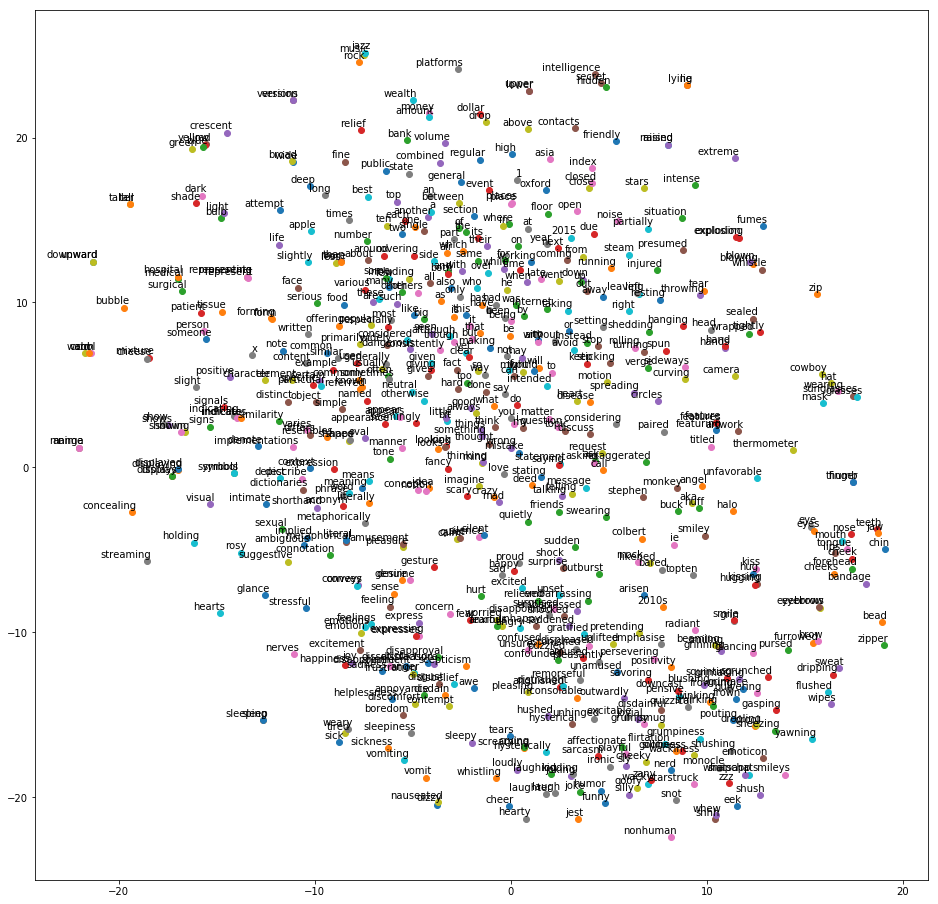

In [155]:
# Captions （学習させたもの）に使われている語彙
txt_list = list(Captions)
txt = []
txt_list_in_list = [txt.replace('\n', '').replace('-',' ').replace('–','').split() for txt in txt_list]
for txt_list in txt_list_in_list:
    for i in range(len(txt_list)):
        txt.append(txt_list[i])
vocab = set(txt)
emb_of_voc = {}
for word in vocab:
    try:
        emb_of_voc[word] = emb_dict[word]
    except KeyError:
        continue
emb_of_voc
tsne_plot(emb_of_voc, 'tsne_words_of_detaileddesc.png')

{'surprise': array([ 6.8098e-02,  3.0976e-01,  2.2928e-01, -7.3947e-02, -2.2907e-01,
        2.8550e-01,  3.8344e-01, -3.7180e-01, -1.2261e-01, -9.0136e-01,
       -1.5432e-01,  1.5603e-01, -1.6993e-01,  3.3443e-01,  6.6593e-02,
        1.8193e-01, -4.1686e-02, -3.3929e-01,  3.2820e-02,  1.1772e-01,
        5.5329e-01, -5.9384e-02,  6.7958e-02,  2.7356e-02,  1.9804e-02,
       -1.0549e-01,  2.0574e-01, -5.8238e-01,  5.9541e-01, -2.5619e-02,
       -5.1348e-01, -3.0628e-01, -1.6351e-01, -8.2496e-02, -1.4401e+00,
        2.4761e-01, -4.4334e-01,  3.1880e-01,  2.6978e-01, -1.1884e-01,
       -2.6800e-01, -6.9424e-02,  4.5646e-01,  1.5705e-01, -4.3489e-01,
       -2.3117e-02, -1.4877e-01, -4.0150e-01,  9.6516e-03,  2.3947e-01,
        1.0859e-01, -5.4466e-02,  1.5025e-01,  4.8298e-01, -5.8904e-02,
        1.5944e-01, -2.2507e-01, -4.3642e-01,  4.5749e-01,  5.9199e-01,
       -9.6858e-02,  1.3166e-01,  4.1938e-01,  1.5684e-01, -2.4400e-01,
       -2.4231e-01,  4.1130e-01, -5.7816e-02, -6.16

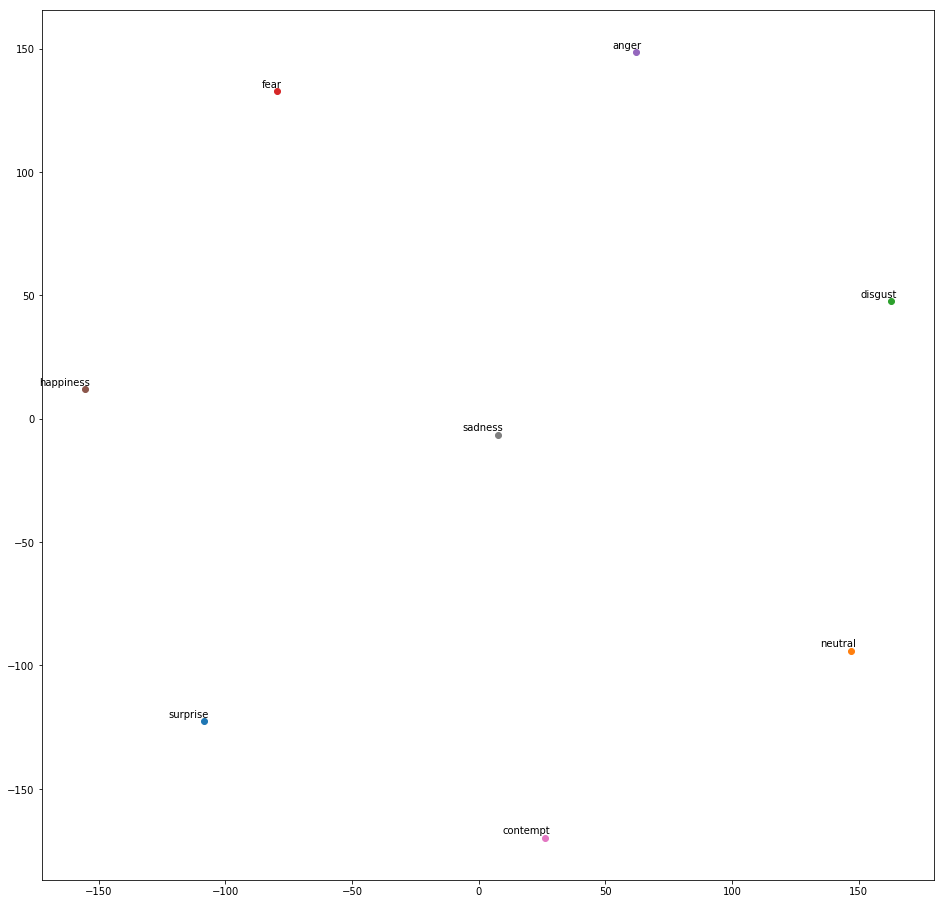

In [52]:
feeling = {'neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt'}
emb_of_feel = {}
for word in feeling:
    emb_of_feel[word] = emb_dict[word]
print(emb_of_feel)
tsne_plot(emb_of_feel, img_save_path='./emb_of_feelings.png')

#### make connection between each emoji and description (embedding) to plot by using t-SNE

In [67]:
import pandas as pd
from PIL import Image
cap_df = pd.read_csv('images/caption.csv', index_col=0)
cap_emb_dict = {}
emojis = []
for i in range(260):
    cap = cap_df['caption'][i]
    emojis.append(Image.open('images/original/'+str(i)+'.png'))
    cap_embedded = glove_model.encode_doc(cap)
    cap_emb_dict[i] = cap_embedded

In [100]:
plt.close('all')

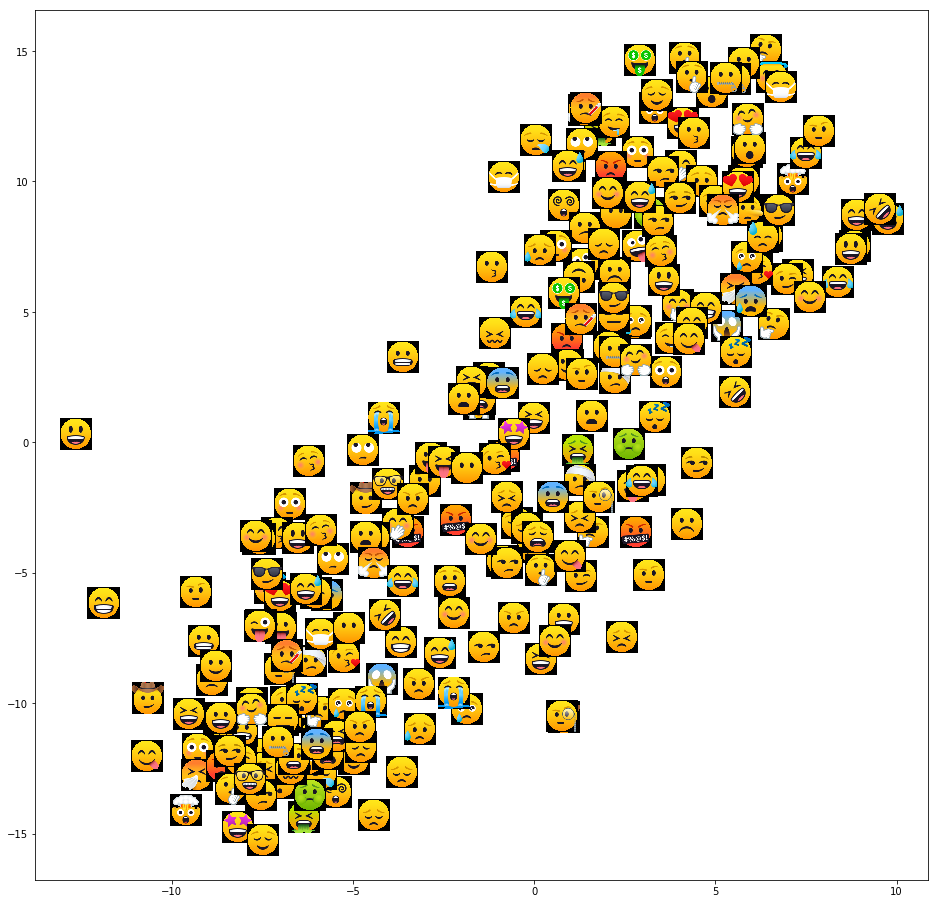

In [102]:
tsne_plot(model=cap_emb_dict, img_save_path='emoji_tsne_plot.png', use_emoji=True, emojis=emojis)

### textを与えてどんな絵文字ができるか見る

In [50]:
from cgan_emoji import DCGAN

img_size = (64, 64, 3)
img_path = './emoji/edited/'
txt_path = './emoji/description/detailed'
glove_path = './utils/glove.6B.300d.txt'

dcgan = DCGAN(img_path, txt_path, glove_path)
dcgan.load_model()

# たとえば
captions = ["nerd eyeglasses and kissing", "drop tears from red hearts for eye"]

for caption in captions:
    generated_image = dcgan.generate_image_from_text(caption)
    generated_image.save('./images/emoji_from_text/' + caption.replace(' ', '_').replace('-', '_') + '.png')

***discriminator model is as below:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
d_input (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 32, 32, 64)   1792        d_input[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_16 (LeakyReLU)      (None, 32, 32, 64)   0           conv2d_28[0][0]                  
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 32, 32, 64)   0           leaky_re_lu_16[0][0]             
_________________________________________________________________________

In [8]:
# 同様に、input()で入力した語から絵文字を生成してみる
caption = input()

generated_image = dcgan.generate_image_from_text(caption)
generated_image.save('./images/generate_test/' + str(caption) + '.png')

happiness


### 以下は学習過程の可視化に使ったコード

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

history = pd.read_csv('saved_model/history.csv', index_col=0)
#mean_history.plot(subplots=True)

In [9]:
mean_history = history.groupby('epoch').mean()

In [3]:
history

epoch  batch    d_loss         acc    g_loss  time[sec]  trial
0          0      0  1.140659   32.692307  1.150012   5.829974      1
1          0      1  1.096318   55.769229  0.651495   0.099434      2
2          0      2  0.926747   50.000000  0.679262   0.075617      3
3          0      3  0.553349   75.000000  1.329310   0.070441      4
4          0      4  0.945848   50.000000  1.241062   0.063261      5
5          0      5  0.987189   55.769229  1.025371   0.058066      6
6          0      6  0.746669   65.384614  1.488755   0.061383      7
7          0      7  0.872812   42.307693  1.553858   0.058015      8
8          0      8  0.907037   48.076925  1.397087   0.056875      9
9          1      0  0.886691   50.000000  1.221217   0.052103     10
10         1      1  0.919580   50.000000  1.297600   0.049547     11
11         1      2  0.973322   46.153846  1.408093   0.051309     12
12         1      3  1.306914   34.615386  1.073153   0.050572     13
13         1      4  1.248219   23.076925  1.104987   0.054109     14
14         1      5  1.366756   36.538461  1.140600   0.052616     15
15         1      6  1.201097   32.692307  1.063195   0.057060     16
16         1      7  1.133356   44.230771  1.154916   0.052048     17
17         1      8  1.443401   26.923078  1.169703   0.058913     18
18         2      0  1.329968   21.153846  0.851623   0.053341     19
19         2      1  1.043909   44.230771  1.153571   0.052655     20
20         2      2  1.129677   34.615386  1.142847   0.052894     21
21         2      3  1.358470   30.769232  1.333772   0.053955     22
22         2      4  1.312394   15.384616  0.917991   0.052187     23
23         2      5  1.229045   30.769232  0.813704   0.052817     24
24         2      6  1.112239   34.615386  0.920255   0.052165     25
25         2      7  1.275877   28.846154  1.187656   0.052364     26
26         2      8  1.350903   28.846154  1.304122   0.051474     27
27         3      0  1.397286   17.307693  1.019317   0.052867     28
28         3      1  0.998266   40.384617  1.162573   0.053224     29
29         3      2  1.127455   36.538464  1.167929   0.052054     30
...      ...    ...       ...         ...       ...        ...    ...
44970   4996      6  0.003243  100.000000  0.002050   0.051657  44971
44971   4996      7  0.000627  100.000000  0.001045   0.051764  44972
44972   4996      8  0.717861   30.769232  0.666982   0.054256  44973
44973   4997      0  0.006006  100.000000  0.007278   0.052432  44974
44974   4997      1  0.726256   34.615386  0.697130   0.052566  44975
44975   4997      2  0.682624   51.923078  0.748987   0.050630  44976
44976   4997      3  0.736602   32.692307  0.707060   0.051319  44977
44977   4997      4  0.708471   42.307693  0.716327   0.051598  44978
44978   4997      5  0.724938   30.769232  0.712830   0.050469  44979
44979   4997      6  0.003602  100.000000  0.002164   0.052004  44980
44980   4997      7  0.000586  100.000000  0.001512   0.052890  44981
44981   4997      8  0.725759   30.769232  0.714254   0.052749  44982
44982   4998      0  0.008162  100.000000  0.006991   0.051432  44983
44983   4998      1  0.711911   30.769232  0.730729   0.054442  44984
44984   4998      2  0.684026   53.846157  0.757609   0.051825  44985
44985   4998      3  0.753121   28.846154  0.685845   0.050484  44986
44986   4998      4  0.719905   42.307693  0.728986   0.051256  44987
44987   4998      5  0.748537   26.923078  0.700675   0.052627  44988
44988   4998      6  0.003409  100.000000  0.001629   0.051249  44989
44989   4998      7  0.000665  100.000000  0.001692   0.051604  44990
44990   4998      8  0.710723   42.307693  0.708777   0.051214  44991
44991   4999      0  0.007016  100.000000  0.009110   0.050746  44992
44992   4999      1  0.712137   44.230771  0.664794   0.051522  44993
44993   4999      2  0.680965   53.846157  0.774903   0.051368  44994
44994   4999      3  0.732223   42.307693  0.702993   0.053726  44995
44995   4999     

In [86]:
plt.rcParams['font.family'] = 'DejaVu Sans' # 全体のフォントを設定
plt.rcParams['font.size'] = 16 # フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 # 軸の太さを設定。目盛りは変わらない
plt.rcParams['xtick.labelsize'] = 16 # 軸だけ変更される
plt.rcParams['ytick.labelsize'] = 12 # 軸だけ変更される
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width

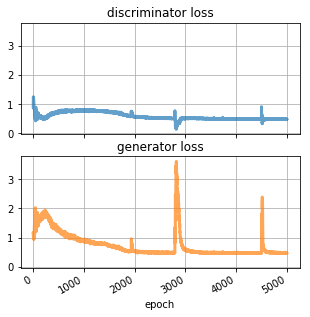

In [16]:
history4plot = mean_history.drop(['acc', 'batch', 'time[sec]'], axis=1)
history4plot.plot(figsize=(5, 5), grid=True, alpha=0.7, kind='line', subplots=True, sharey=True, 
             legend=False, linewidth=3.0,  title=['discriminator loss', 'generator loss'])
#plt.show()
plt.savefig('gan_loss_plot_20200110.png')
#plt.close()

#### testのhistory

In [11]:
import matplotlib as plt
%matplotlib inline
import pandas as pd

history = pd.read_csv('./saved_model/history_test.csv', index_col=1)
history

Unnamed: 0    d_loss        acc    g_loss  time[sec]
epoch                                                      
0               0  1.462595  51.923078  2.743922   0.619724
1               1  1.240497  50.000000  2.260751   0.021587
2               2  1.078867  50.000000  1.892555   0.018419
3               3  1.061118  50.000000  1.847843   0.018543
4               4  0.862502  50.000000  1.369438   0.018814
5               5  0.911677  50.000000  1.457886   0.019308
6               6  0.847090  50.000000  1.309924   0.018366
7               7  0.874603  50.000000  1.392522   0.018900
8               8  1.028858  50.000000  1.770931   0.018438
9               9  0.900753  50.000000  1.464034   0.035882
10             10  0.809615  50.000000  1.226894   0.022869
11             11  0.913591  50.000000  1.497926   0.018510
12             12  0.937231  50.000000  1.563401   0.018919
13             13  0.898161  50.000000  1.472590   0.018753
14             14  0.920123  50.000000  1.550051   0.019197
15             15  0.828016  50.000000  1.292339   0.018750
16             16  0.914956  50.000000  1.521966   0.019098
17             17  0.954780  50.000000  1.613617   0.020117
18             18  0.891027  50.000000  1.435155   0.017761
19             19  0.952869  50.000000  1.609029   0.019172
20             20  0.947283  50.000000  1.580663   0.018464
21             21  0.819210  50.000000  1.265202   0.019321
22             22  0.840269  50.000000  1.338046   0.018408
23             23  0.866002  50.000000  1.385378   0.024664
24             24  0.857081  50.000000  1.378281   0.026105
25             25  0.815845  50.000000  1.286304   0.027498
26             26  0.884036  50.000000  1.409813   0.030400
27             27  0.850063  50.000000  1.344985   0.018950
28             28  0.791408  50.000000  1.249950   0.018245
29             29  0.869909  50.000000  1.458444   0.018845
...           ...       ...        ...       ...        ...
4970         4970  1.000103  50.000000  1.553984   0.018489
4971         4971  1.031989  50.000000  1.638482   0.018025
4972         4972  1.021606  51.923078  1.602000   0.030208
4973         4973  1.000776  51.923078  1.546248   0.026112
4974         4974  1.008735  51.923078  1.571312   0.026491
4975         4975  1.026014  50.000000  1.622265   0.018485
4976         4976  1.022336  51.923078  1.604219   0.018620
4977         4977  1.013229  50.000000  1.591365   0.018318
4978         4978  0.983710  51.923078  1.515250   0.018606
4979         4979  1.020052  50.000000  1.625939   0.018169
4980         4980  0.979561  50.000000  1.499777   0.018321
4981         4981  1.008612  50.000000  1.582509   0.018813
4982         4982  1.016892  50.000000  1.592953   0.018588
4983         4983  1.019025  50.000000  1.599819   0.020010
4984         4984  1.048276  50.000000  1.664195   0.021354
4985         4985  1.036081  51.923078  1.628401   0.018167
4986         4986  1.010823  50.000000  1.562723   0.018568
4987         4987  1.056838  50.000000  1.686615   0.018201
4988         4988  1.023550  48.076922  1.603265   0.025082
4989         4989  1.080039  50.000000  1.747305   0.022107
4990         4990  1.038578  50.000000  1.639530   0.021183
4991         4991  1.018908  50.000000  1.576652   0.017802
4992         4992  1.025384  51.923078  1.588825   0.017892
4993         4993  1.018853  51.923078  1.570558   0.018801
4994         4994  1.029181  51.923078  1.599815   0.018164
4995         4995  1.036365  50.000000  1.625403   0.018465
4996         4996  1.008359  51.923078  1.538816   0.018625
4997         4997  1.036630  50.000000  1.623661   0.017750
4998         4998  1.022820  50.000000  1.592090   0.018382
4999         4999  1.011715  51.923078  1.553899   0.018352

[5000 rows x 5 columns]

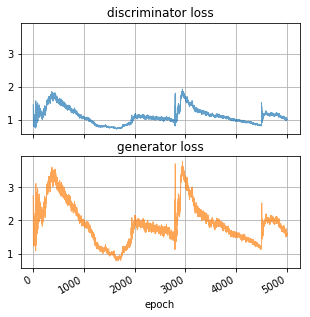

In [16]:
history = history.drop(['acc', 'time[sec]', 'Unnamed: 0'], axis=1)
import matplotlib.pyplot as plt
history.plot(figsize=(5, 5), grid=True, alpha=0.7, kind='line', subplots=True, sharey=True, 
             legend=False, linewidth=1.0, title=['discriminator loss', 'generator loss'])
#plt.show()
plt.savefig('face_classifier_hist.png')
#plt.close()

----

## 出力された絵文字の可視化など

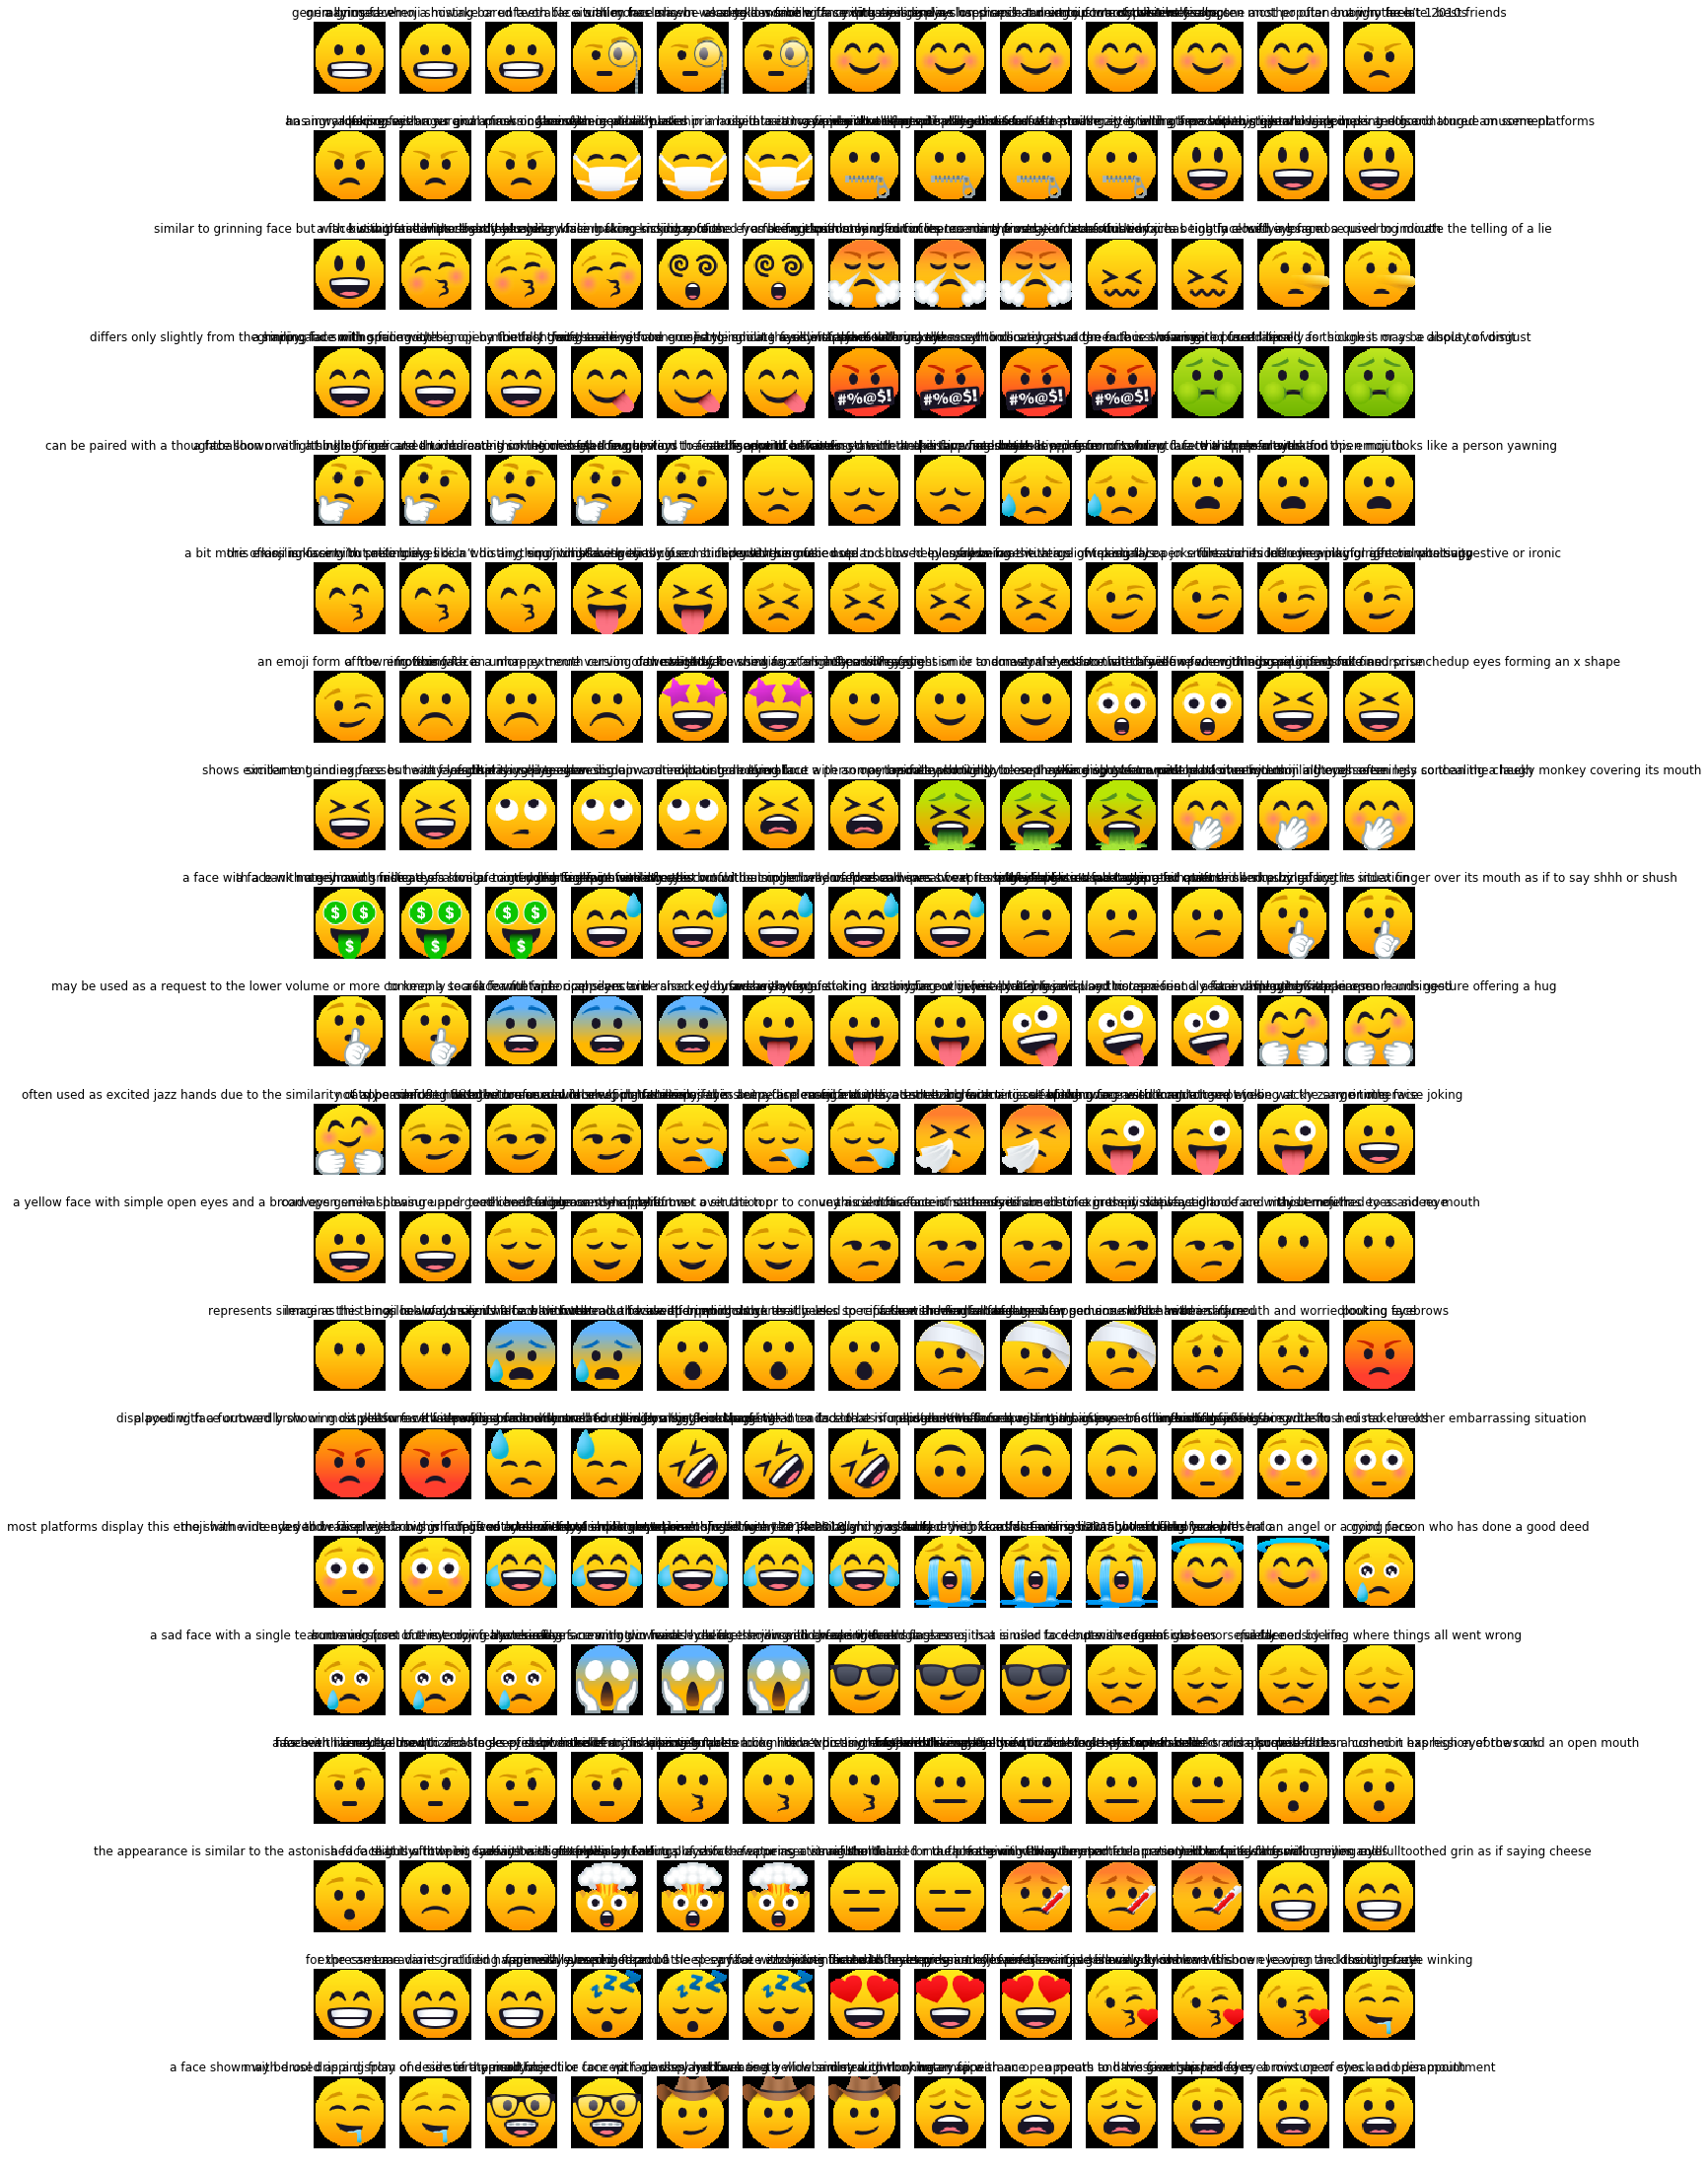

In [124]:
fig, ax = plt.subplots(20, 13, figsize=(20, 40))
for i, (image, txt) in enumerate(zip(X_train, Captions)):
    edited_image = image * 127.5 + 127.5
    edited_image = Image.fromarray(edited_image.astype(np.uint8))
    ax[int((i - (i %13))/13)][(i%13)].imshow(edited_image)
    ax[int((i - (i %13))/13)][(i%13)].axis('off')
    ax[int((i - (i %13))/13)][(i%13)].set_title(txt)

(0.0, 1.0, 0.0, 1.0)

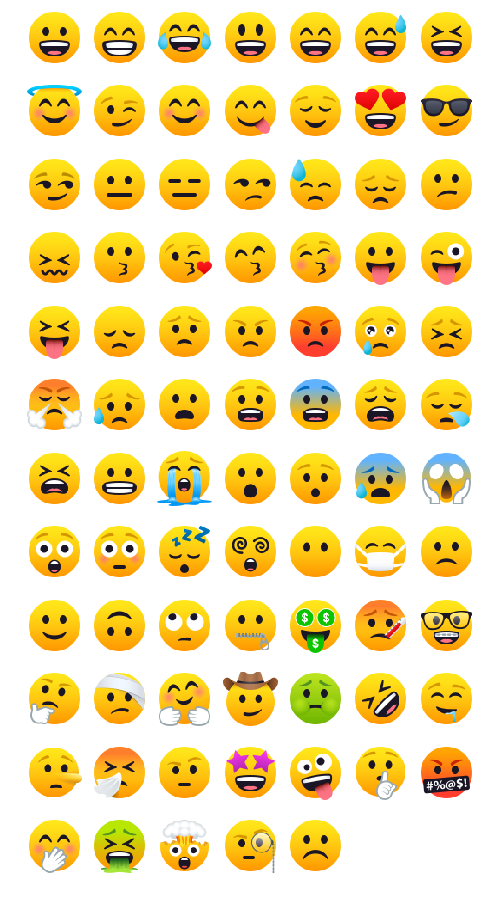

In [132]:
with open('emoji/description/english.txt') as f:
    txt_list = f.readlines()

fig, ax = plt.subplots(12, 7, figsize=(8, 16))

for i, (png, txt) in enumerate(zip([png for png in os.listdir('emoji/edited')  if '.png' in png ], txt_list)):
    txt = txt.replace('\n', '')
    img = Image.open('emoji/edited/'+png)
    img.convert('RGBA')
    ax[int((i - (i %7))/7)][(i%7)].imshow(np.array(img))
    ax[int((i - (i %7))/7)][(i%7)].axis('off')
ax[11][5].axis('off')
ax[11][6].axis('off')
    #ax[int((i - (i %7))/7)][(i%7)].set_title(txt)

In [139]:
fig.savefig('original_emojis.png')

### 自分の顔写真のプロット

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from PIL import Image
import numpy as np

fig, ax = plt.subplots(5, 6, figsize=(8, 8))
pathstr = 'photo/'
for i, org_img in enumerate(sorted(Path(pathstr).glob('*.jpeg'))):
    img = Image.open(str(org_img))
    img.convert('RGBA')
    ax[int((i - (i %6))/6)][(i%6)].imshow(np.array(img))
    ax[int((i - (i %6))/6)][(i%6)].axis('off')

### 自分の顔写真から生成された絵文字の可視化

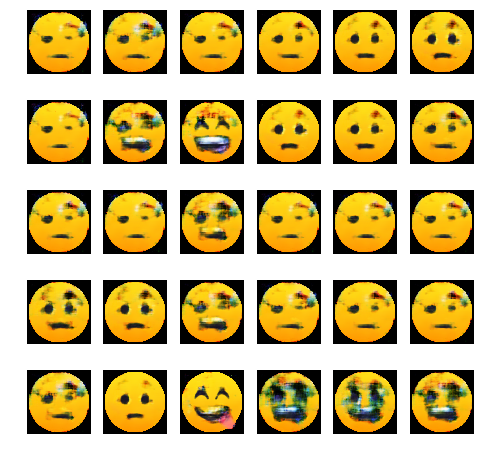

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from PIL import Image
import numpy as np

fig, ax = plt.subplots(5, 6, figsize=(8, 8))
pathstr = 'images/fromphoto/'
for i, org_img in enumerate(sorted(Path(pathstr).glob('*.png'))):
    img = Image.open(str(org_img))
    img.convert('RGBA')
    ax[int((i - (i %6))/6)][(i%6)].imshow(np.array(img))
    ax[int((i - (i %6))/6)][(i%6)].axis('off')

In [17]:
fig.savefig('emoji_from_photo_of_me.png')

### c-DCGANの学習途中の出力の可視化

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pathlib
from PIL import Image

IndexError has been thrown when i is  100


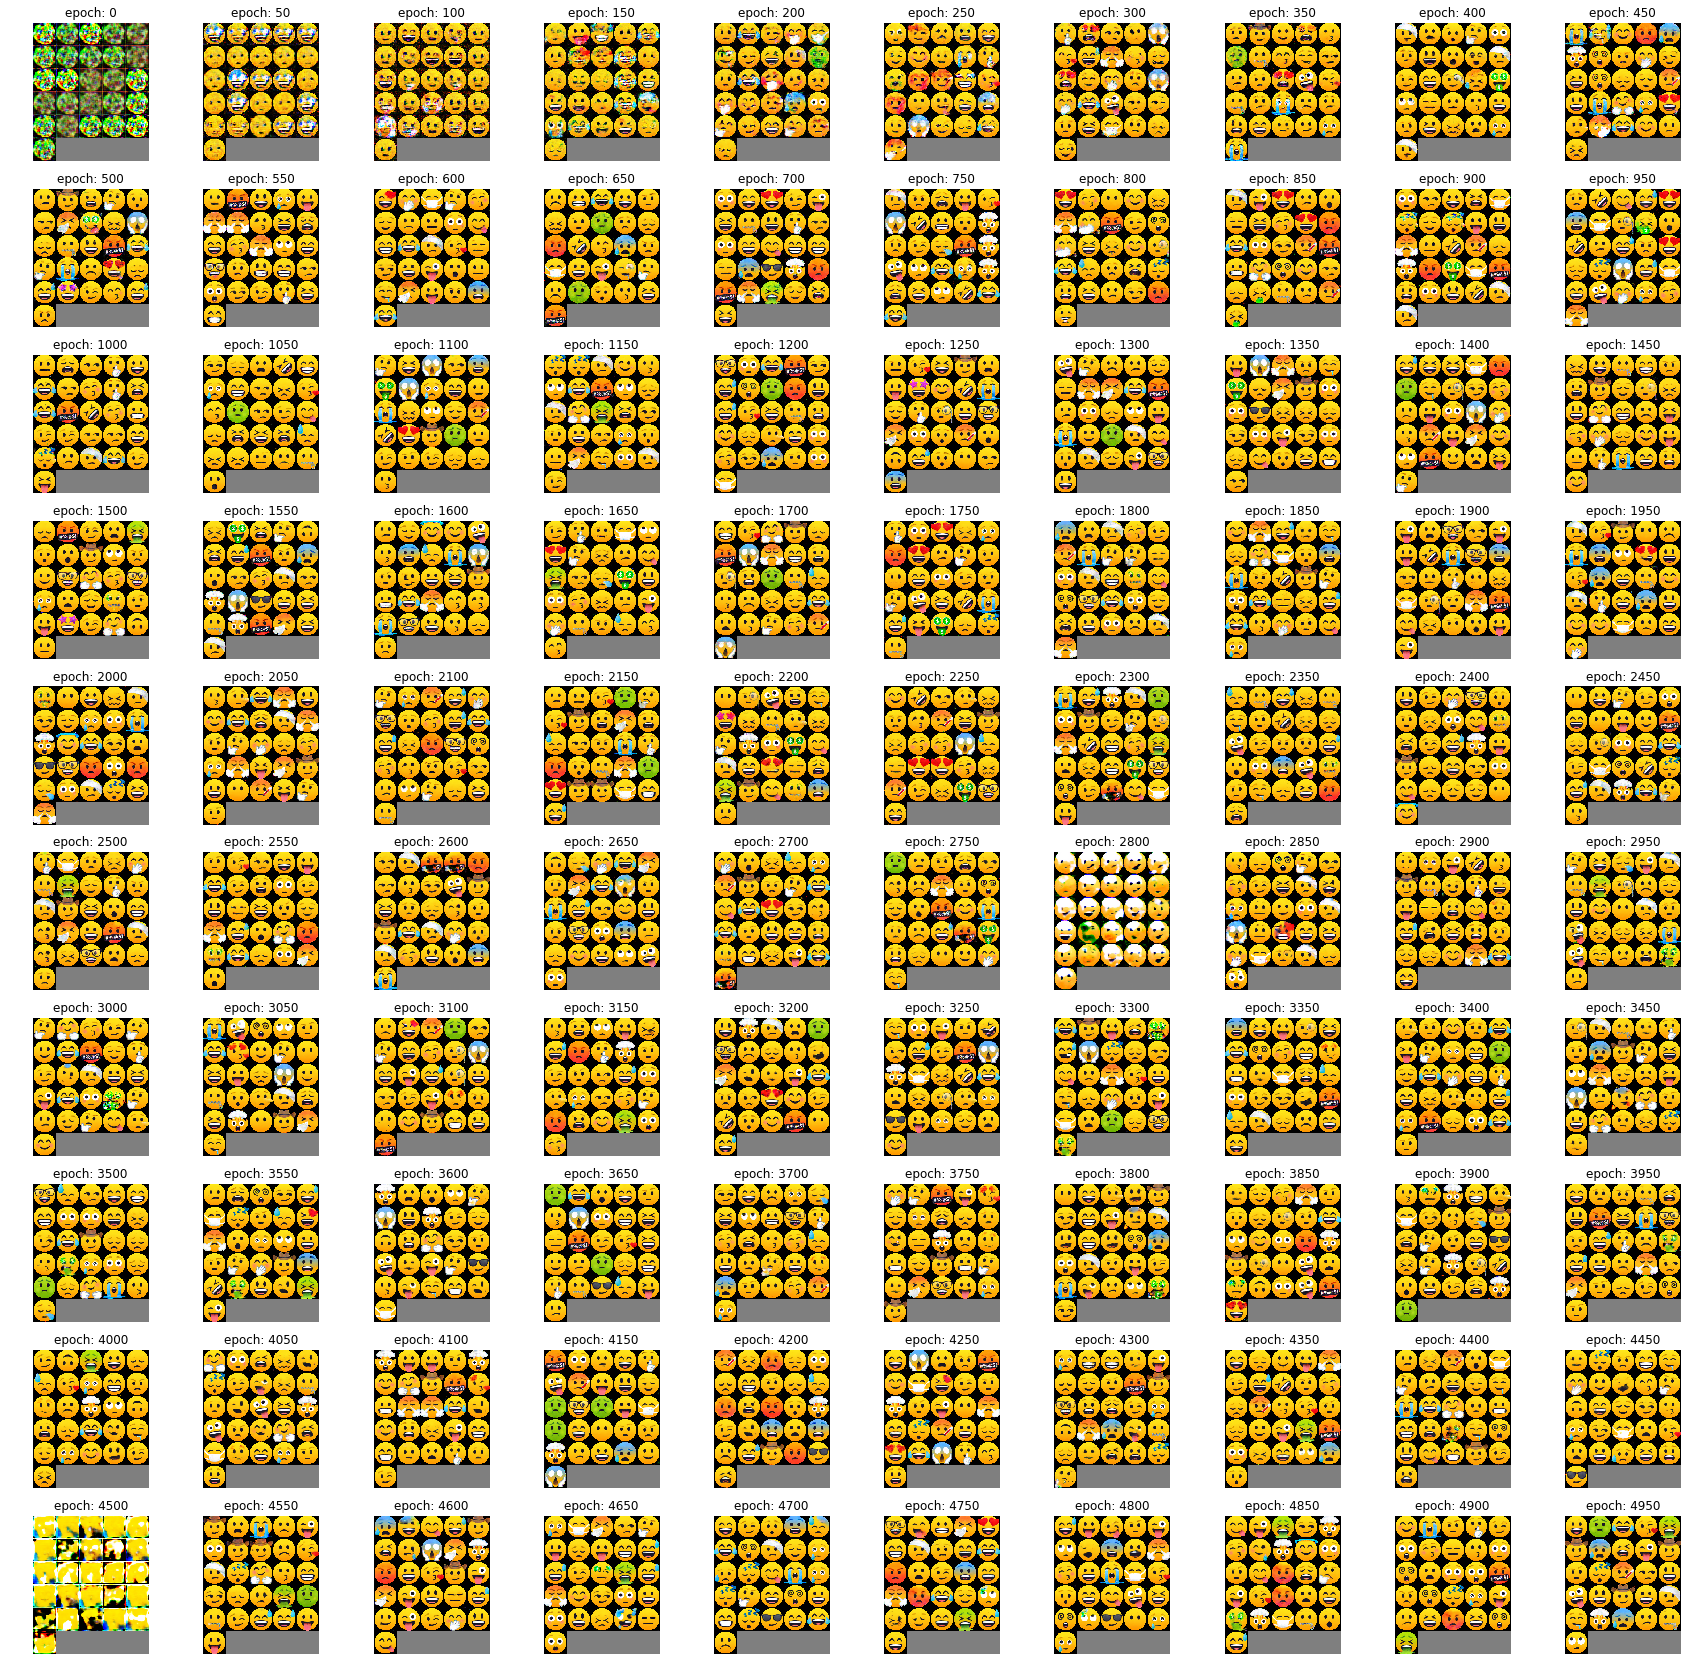

In [19]:
fig, ax = plt.subplots(10, 10, figsize=(30, 30))
for i, img_path in enumerate(pathlib.Path('images/snapshot/').glob('*.png')):
    try:
        image = Image.open(img_path)
        ax[int((i - (i %10))/10)][(i%10)].imshow(np.array(image))
        ax[int((i - (i %10))/10)][(i%10)].axis('off')
        ax[int((i - (i %10))/10)][(i%10)].set_title('epoch: '+str(img_path).replace('.png', '').replace('images/snapshot/', ''))
    except IndexError:
        print('IndexError has been thrown when i is ', i)
        continue

In [18]:
plt.close('all')

In [ ]:
with open('emoji/description/english.txt') as f:
    txt_list = f.readlines()

fig, ax = plt.subplots(12, 7, figsize=(8, 16))

for i, (png, txt) in enumerate(zip([png for png in os.listdir('emoji/edited')  if '.png' in png ], txt_list)):
    txt = txt.replace('\n', '')
    img = Image.open('emoji/edited/'+png)
    img.convert('RGBA')
    ax[int((i - (i %7))/7)][(i%7)].imshow(np.array(img))
    ax[int((i - (i %7))/7)][(i%7)].axis('off')
ax[11][5].axis('off')
ax[11][6].axis('off')
    #ax[int((i - (i %7))/7)][(i%7)].set_title(txt)

In [21]:
fig.savefig('output_emojis_0_to_4950.png')

### dataset の中身を改めて確認

In [33]:
from utils import dataset_utils.py
texts = load_dataset(img_path, txt_path, img_size)

Acquiring images & labels...
t_path is  emoji/description/detailed
i_path is  emoji/edited


In [36]:
list(texts.values())

['rolling on the floor laughing. a yellow face with a big grin and scrunched eyes forming an x shape, titled on its side as if rolling on the floor laughing (the internet acronym rofl). conveys hysterical laughter intended to be more intense than face with tears of joy.',
 'tired face. an exhausted-looking face with an open mouth and tightly closed eyes.',
 'kissing face. this emoji is kissing, but also looks like a whistling emoji, or blowing air. a bit more of an ‘innocent, i’m pretending i didn’t do anything’ whistle, especially if combined with the music note.',
 'pouting face. a pouting face outwardly showing displeasure with a person or situation. displayed with a furrowed brow on most platforms, this emoji is commonly used for mad or angry emotions.',
 'grinning face. a yellow face with simple open eyes and a broad open smile, showing upper teeth and tongue on some platforms. conveys general pleasure and good cheer or humor.',
 'face screaming in fear. a screaming face with two 

In [37]:
len(list(texts.values()))

82

In [39]:
len([text.split() for text in texts.values()])

82

In [45]:
txt_list = texts.values()
text_list = []
txt_list_in_list = [txt.replace('\n', '').replace('-',' ').split('.') for txt in txt_list]
for txt_list in txt_list_in_list:
    for i in range(len(txt_list)):
        if txt_list[i] == '':
            continue
        text_list.append(txt_list[i])
text_list

['rolling on the floor laughing',
 ' a yellow face with a big grin and scrunched eyes forming an x shape, titled on its side as if rolling on the floor laughing (the internet acronym rofl)',
 ' conveys hysterical laughter intended to be more intense than face with tears of joy',
 'tired face',
 ' an exhausted looking face with an open mouth and tightly closed eyes',
 'kissing face',
 ' this emoji is kissing, but also looks like a whistling emoji, or blowing air',
 ' a bit more of an ‘innocent, i’m pretending i didn’t do anything’ whistle, especially if combined with the music note',
 'pouting face',
 ' a pouting face outwardly showing displeasure with a person or situation',
 ' displayed with a furrowed brow on most platforms, this emoji is commonly used for mad or angry emotions',
 'grinning face',
 ' a yellow face with simple open eyes and a broad open smile, showing upper teeth and tongue on some platforms',
 ' conveys general pleasure and good cheer or humor',
 'face screaming in f

In [46]:
len(text_list)

260